In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read in weather data, clean, and verify validity

In [171]:
### read in 5 years of weather data
weather11 = pd.read_csv('../ABE516/ADWweather11.csv', sep = ',')
weather12 = pd.read_csv('../ABE516/ADWweather12.csv', sep = ',')
weather13 = pd.read_csv('../ABE516/ADWweather13.csv', sep = ',')
weather14 = pd.read_csv('../ABE516/ADWweather14.csv', sep = ',')
weather15 = pd.read_csv('../ABE516/ADWweather15.csv', sep = ',')

In [239]:
### concatenate the five years into one dataframe
weather = pd.concat([weather11, weather12, weather13, weather14, weather15], axis = 0)

In [240]:
weather.head()

,TIMESTAMP,Rain_in_Tot_in,AirTF_Avg
0,1/1/2011 0:00,0,3.915
1,1/1/2011 1:00,0,3.07
2,1/1/2011 2:00,0.01,1.797
3,1/1/2011 3:00,0,1.252
4,1/1/2011 4:00,0,1.186


In [241]:
weather.shape

(48431, 3)

In [242]:
### Within the five separate datasets I concatenated, there may be overlap in the dates, so I check for duplicates
duplicates = weather.duplicated(subset=["TIMESTAMP"])
print(weather[duplicates])

### I found 7771 duplicates

       TIMESTAMP Rain_in_Tot_in  AirTF_Avg
2517         NaN            NaN        NaN
2518        TOA5           3344        NaN
2519   TIMESTAMP    Rain_in_Tot  AirTF_Avg
2520          TS           inch      Deg F
2521         NaN            Tot        Avg
...          ...            ...        ...
8069  12/10/2014            0.0      22.57
8070  12/10/2014            0.0      23.23
8071  12/10/2014            0.0      24.66
8072  12/10/2014            0.0      24.95
8073  12/10/2014            0.0      26.32

[7771 rows x 3 columns]


In [243]:
### drop the duplicates
weather.drop_duplicates(subset=["TIMESTAMP"], inplace=True)

In [244]:
### 48431 - 7771 = 40660
weather

,TIMESTAMP,Rain_in_Tot_in,AirTF_Avg
0,1/1/2011 0:00,0,3.915
1,1/1/2011 1:00,0,3.07
2,1/1/2011 2:00,0.01,1.797
3,1/1/2011 3:00,0,1.252
4,1/1/2011 4:00,0,1.186
...,...,...,...
8568,12/14/2015 6:00,0.11,37.69
8569,12/14/2015 7:00,0.27,37.0
8570,12/14/2015 8:00,0.56,36.33
8571,12/14/2015 9:00,0.23,35.5


In [245]:
### check for missing values
print(weather.isna().sum())

TIMESTAMP         1
Rain_in_Tot_in    2
AirTF_Avg         1
dtype: int64


In [246]:
missing_values = weather[weather.isnull().any(axis=1)]

In [247]:
missing_values
# Need to remove extra header rows that were concatenated
# Documentation indicates that missing precipitation values are times when erroneous data was recorded

,TIMESTAMP,Rain_in_Tot_in,AirTF_Avg
2457,TOA5,3344,NaN
2460,NaN,Tot,Avg
6960,10/18/2014,NaN,44.89
6984,10/19/2014,NaN,38.98


In [248]:
weather.iloc[2456:2462, :]

,TIMESTAMP,Rain_in_Tot_in,AirTF_Avg
2456,4/13/2011 8:00,0,46.41
2457,TOA5,3344,NaN
2458,TIMESTAMP,Rain_in_Tot,AirTF_Avg
2459,TS,inch,Deg F
2460,NaN,Tot,Avg
2461,4/13/2011 9:00,0,50.47


In [249]:
filtered_weather = weather.dropna()
# This removes NAs

In [250]:
filtered_weather.shape

(40656, 3)

In [251]:
filtered_weather.iloc[2456:2462, :]
# This shows I still have header rows to remove

,TIMESTAMP,Rain_in_Tot_in,AirTF_Avg
2456,4/13/2011 8:00,0,46.41
2458,TIMESTAMP,Rain_in_Tot,AirTF_Avg
2459,TS,inch,Deg F
2461,4/13/2011 9:00,0,50.47
2462,4/13/2011 10:00,0,51.58
2463,4/13/2011 11:00,0,53.19


In [252]:
filtered_weather = weather[~weather.isin(['TIMESTAMP', 'TS'])].dropna()

In [253]:
filtered_weather.shape

(40654, 3)

In [254]:
filtered_weather.iloc[2456:2462, :]
# Header rows removed

,TIMESTAMP,Rain_in_Tot_in,AirTF_Avg
2456,4/13/2011 8:00,0,46.41
2461,4/13/2011 9:00,0,50.47
2462,4/13/2011 10:00,0,51.58
2463,4/13/2011 11:00,0,53.19
2464,4/13/2011 12:00,0,55.51
2465,4/13/2011 13:00,0,57.12


In [255]:
### make TIMESTAMP a datetime index
filtered_weather['datetime'] = pd.to_datetime(filtered_weather['TIMESTAMP'])
filtered_weather.set_index('datetime', inplace=True)

In [256]:
filtered_weather.dtypes

TIMESTAMP         object
Rain_in_Tot_in    object
AirTF_Avg         object
dtype: object

In [257]:
### make rain and temp values floats
filtered_weather['Rain_in_Tot_in'] = filtered_weather['Rain_in_Tot_in'].astype(float)

In [258]:
filtered_weather['Rain (cm)'] = filtered_weather['Rain_in_Tot_in'] * 2.54
filtered_weather

,TIMESTAMP,Rain_in_Tot_in,AirTF_Avg,Rain (cm)
datetime,,,,
2011-01-01 00:00:00,1/1/2011 0:00,0.00,3.915,0.0000
2011-01-01 01:00:00,1/1/2011 1:00,0.00,3.070,0.0000
2011-01-01 02:00:00,1/1/2011 2:00,0.01,1.797,0.0254
2011-01-01 03:00:00,1/1/2011 3:00,0.00,1.252,0.0000
2011-01-01 04:00:00,1/1/2011 4:00,0.00,1.186,0.0000
...,...,...,...,...
2015-12-14 06:00:00,12/14/2015 6:00,0.11,37.690,0.2794
2015-12-14 07:00:00,12/14/2015 7:00,0.27,37.000,0.6858
2015-12-14 08:00:00,12/14/2015 8:00,0.56,36.330,1.4224


In [264]:
filtered_weather = filtered_weather.sort_values(by='Rain (cm)', ascending=False)
print(filtered_weather)

                           TIMESTAMP  Rain_in_Tot_in  AirTF_Avg  Rain (cm)
datetime                                                                  
2011-06-18 14:00:00  6/18/2011 14:00            1.23      65.87     3.1242
2011-06-26 23:00:00  6/26/2011 23:00            1.15      68.32     2.9210
2011-06-21 00:00:00   6/21/2011 0:00            1.03      61.30     2.6162
2012-06-20 19:00:00  6/20/2012 19:00            0.96      65.80     2.4384
2015-06-22 07:00:00   6/22/2015 7:00            0.96      71.37     2.4384
...                              ...             ...        ...        ...
2015-09-22 08:00:00   9/22/2015 8:00            0.00      63.36     0.0000
2015-09-22 09:00:00   9/22/2015 9:00            0.00      67.08     0.0000
2015-09-22 10:00:00  9/22/2015 10:00            0.00      70.11     0.0000
2015-09-21 19:00:00  9/21/2015 19:00            0.00      73.95     0.0000
2013-04-27 00:00:00   4/27/2013 0:00            0.00      52.62     0.0000

[40654 rows x 4 columns]

In [268]:
### Get daily values for total rain and average temp
daily_rain = filtered_weather['Rain (cm)'].resample('D').sum()

In [269]:
### new dataframe with daily values rather than hourly values
daily_rain = pd.DataFrame({'date': daily_rain.index, 'daily_tot_rain_cm': daily_rain.values})

In [270]:
daily_rain

,date,daily_tot_rain_cm
0,2011-01-01,0.0254
1,2011-01-02,0.0000
2,2011-01-03,0.0000
3,2011-01-04,0.0000
4,2011-01-05,0.0000
...,...,...
1804,2015-12-10,0.2032
1805,2015-12-11,0.0000
1806,2015-12-12,0.0000
1807,2015-12-13,3.1750


In [271]:
### create a column for cumulative annual rainfall
daily_rain['annual_cum_rain'] = daily_weather.groupby(daily_weather['date'].dt.year)['daily_tot_rain_cm'].cumsum()
daily_rain

,date,daily_tot_rain_cm,annual_cum_rain
0,2011-01-01,0.0254,0.0254
1,2011-01-02,0.0000,0.0254
2,2011-01-03,0.0000,0.0254
3,2011-01-04,0.0000,0.0254
4,2011-01-05,0.0000,0.0254
...,...,...,...
1804,2015-12-10,0.2032,87.9856
1805,2015-12-11,0.0000,87.9856
1806,2015-12-12,0.0000,87.9856
1807,2015-12-13,3.1750,91.1606


## Visualize weather data

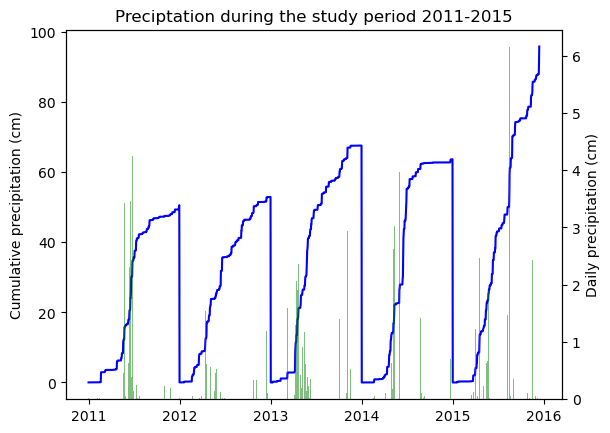

In [274]:
fig, ax1 = plt.subplots()
ax1.plot(daily_rain['date'], daily_rain['annual_cum_rain'], color='blue')
ax1.set_ylabel('Cumulative precipitation (cm)')
ax2 = ax1.twinx()
ax2.bar(daily_rain['date'], daily_rain['daily_tot_rain_cm'], color='green', alpha=0.5)
ax2.set_ylabel('Daily precipitation (cm)')
plt.title('Preciptation during the study period 2011-2015')
plt.savefig('rainfall.png')
plt.show()

# Read in and visualize drainage dataset

In [293]:
### read in ESN dataset
ESNdf = pd.read_csv('../ABE516/ESN.csv', sep = ',')

In [294]:
ESNdf

,Year,Trt,TrtO,Season,Drainage,Nitrate load,Flow-weighted nitrate-N concentration
0,2011,CP-SPUREA-150-S,CPPUREA-150,2,25.593666,24.675991,9.641445
1,2011,CP-SPUREA-150-C,CPPUREA-150,2,24.390486,24.402549,10.004946
2,2011,CP-SPUREA-150-C,CPPUREA-150,2,29.487506,27.824420,9.436003
3,2011,CP-SPUREA-150-S,CPPUREA-150,2,21.700907,28.178205,12.984806
4,2011,CP-SPUREA-150-S,CPPUREA-150,2,3.638093,4.115415,11.312011
...,...,...,...,...,...,...,...
471,2015,CP-SPPOLY-150-C,CPPPOLY-150,Annual,34.260203,64.413037,18.801125
472,2015,CP-SPPOLY-150-C,CPPPOLY-150,Annual,28.462273,33.527756,11.779719
473,2015,CP-SPPOLY-150-S,CPPPOLY-150,Annual,45.494984,80.196089,17.627457
474,2015,CP-SPPOLY-150-S,CPPPOLY-150,Annual,32.040576,73.546862,22.954288


In [295]:
ESN_seasonal_sub = ESNdf.groupby(['Year','Season']).median()['Drainage'].reset_index()
print(ESN_seasonal_sub)

    Year  Season   Drainage
0   2011       2  23.198791
1   2011       3   2.768844
2   2011       4   0.000000
3   2011  Annual  26.136080
4   2012       2   1.177894
5   2012       3   0.705575
6   2012       4   0.000000
7   2012  Annual   1.906341
8   2013       2  21.523517
9   2013       3   0.071982
10  2013       4   0.000000
11  2013  Annual  21.858602
12  2014       2  13.901649
13  2014       3   7.983430
14  2014       4   1.357896
15  2014  Annual  23.001541
16  2015       2  22.589338
17  2015       3   7.532023
18  2015       4  11.523147
19  2015  Annual  44.518958


In [296]:
ESNdf.shape

(476, 7)

In [297]:
### check for missing values
print(ESNdf.isna().sum())

Year                                      0
Trt                                       0
TrtO                                      0
Season                                    0
Drainage                                  0
Nitrate load                              0
Flow-weighted nitrate-N concentration    91
dtype: int64


In [298]:
### make datetime index
filtered_weather['date'] = pd.to_datetime(filtered_weather['TIMESTAMP'])
filtered_weather.set_index('date', inplace=True)

# Calculate monthly precip values, then find seasonal precip values
monthly_data = filtered_weather.resample('M').sum()
monthly_data['season'] = pd.cut(monthly_data.index.month, 
                                bins=[2, 5, 8, 11],
                                labels=['2', '3', '4'])

# Group by year and season and calculate cumulative rainfall
seasonal_data = monthly_data.groupby([monthly_data.index.year, monthly_data['season']])['Rain (cm)'].sum().reset_index()
annual_data = monthly_data.groupby(monthly_data.index.year)['Rain (cm)'].sum()

annual_seasons = pd.DataFrame({
    'Rain (cm)': annual_data.values,
    'season': 'Annual', 'date' : annual_data.index
}, index=annual_data.index)

# Concatenate annual data to seasonal data
seasonal_data = pd.concat([seasonal_data, annual_seasons]).reset_index(drop=True)
seasonal_data

,date,season,Rain (cm)
0,2011,2,13.5128
1,2011,3,28.0416
2,2011,4,3.5560
3,2012,2,22.1742
4,2012,3,14.8336
5,2012,4,10.2616
6,2013,2,39.8526
7,2013,3,16.2306
8,2013,4,10.3124
9,2014,2,21.7932


In [299]:
### rename columns to facilitate a join
seasonal_data.rename(columns = {'date':'Year', 'season':'Season'}, inplace = True)

## Compare precipitation and drainage

In [300]:
### compare rain and drainage
rain_drain = pd.merge(left=seasonal_data, right=ESN_seasonal_sub, on= ['Year', 'Season'])
rain_drain.rename(columns = {'Drainage':'Drainage (cm)', 'Rain_in':'Rainfall (cm)'}, inplace = True)
rain_drain

,Year,Season,Rain (cm),Drainage (cm)
0,2011,2,13.5128,23.198791
1,2011,3,28.0416,2.768844
2,2011,4,3.5560,0.000000
3,2012,2,22.1742,1.177894
4,2012,3,14.8336,0.705575
5,2012,4,10.2616,0.000000
6,2013,2,39.8526,21.523517
7,2013,3,16.2306,0.071982
8,2013,4,10.3124,0.000000
9,2014,2,21.7932,13.901649


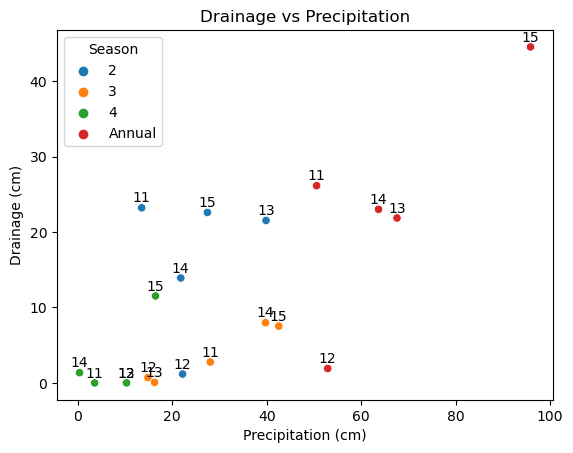

In [301]:
sns.scatterplot(data=rain_drain, x = 'Rain (cm)', y = 'Drainage (cm)', hue = 'Season')
for index, row in rain_drain.iterrows():
    year = str(row['Year'])[2:]  # Remove the first two characters
    plt.annotate(year, xy=(row['Rain (cm)'], row['Drainage (cm)']), xytext=(0, 4), textcoords='offset points', ha = 'center')

plt.title('Drainage vs Precipitation')
plt.xlabel('Precipitation (cm)')
plt.ylabel('Drainage (cm)')
plt.savefig('drainrain.png')
plt.show()

### Drainage data and precipitation data make sense, there are some uniques seasons/years

## Data visualizations

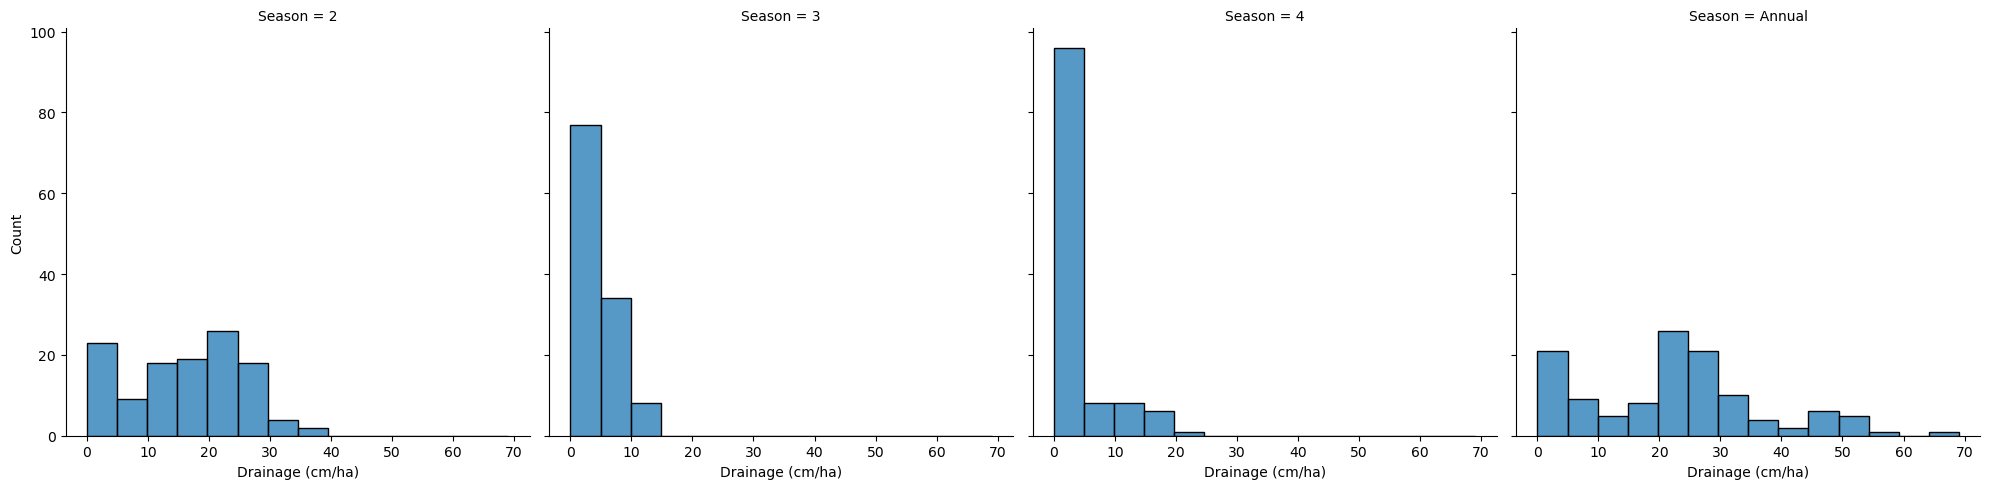

In [329]:
drain_hist = sns.displot(ESNdf, x="Drainage", col = 'Season')
drain_hist.set_axis_labels('Drainage (cm/ha)','Count')
plt.savefig('drainhist.png')
plt.show()

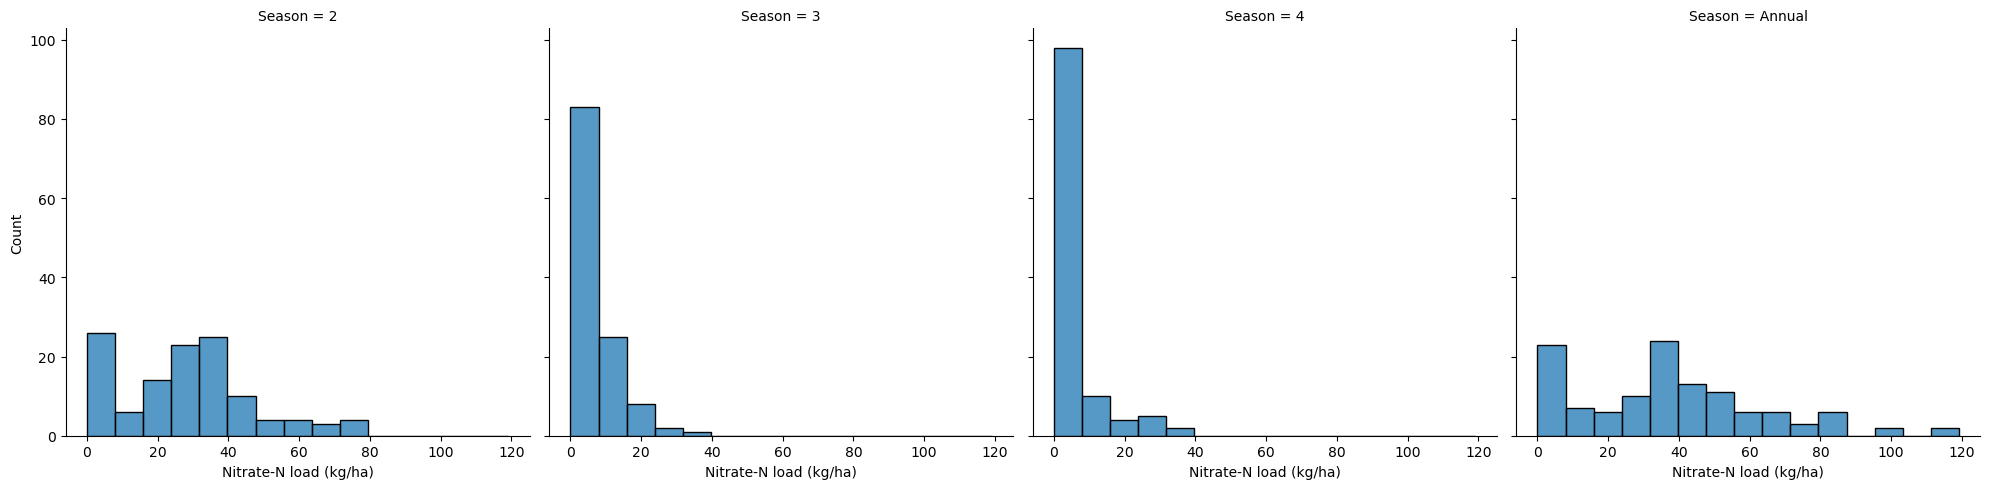

In [330]:
load_hist = sns.displot(ESNdf, x="Nitrate load", col = 'Season')
load_hist.set_axis_labels('Nitrate-N load (kg/ha)','Count')
plt.savefig('loadhist.png')
plt.show()

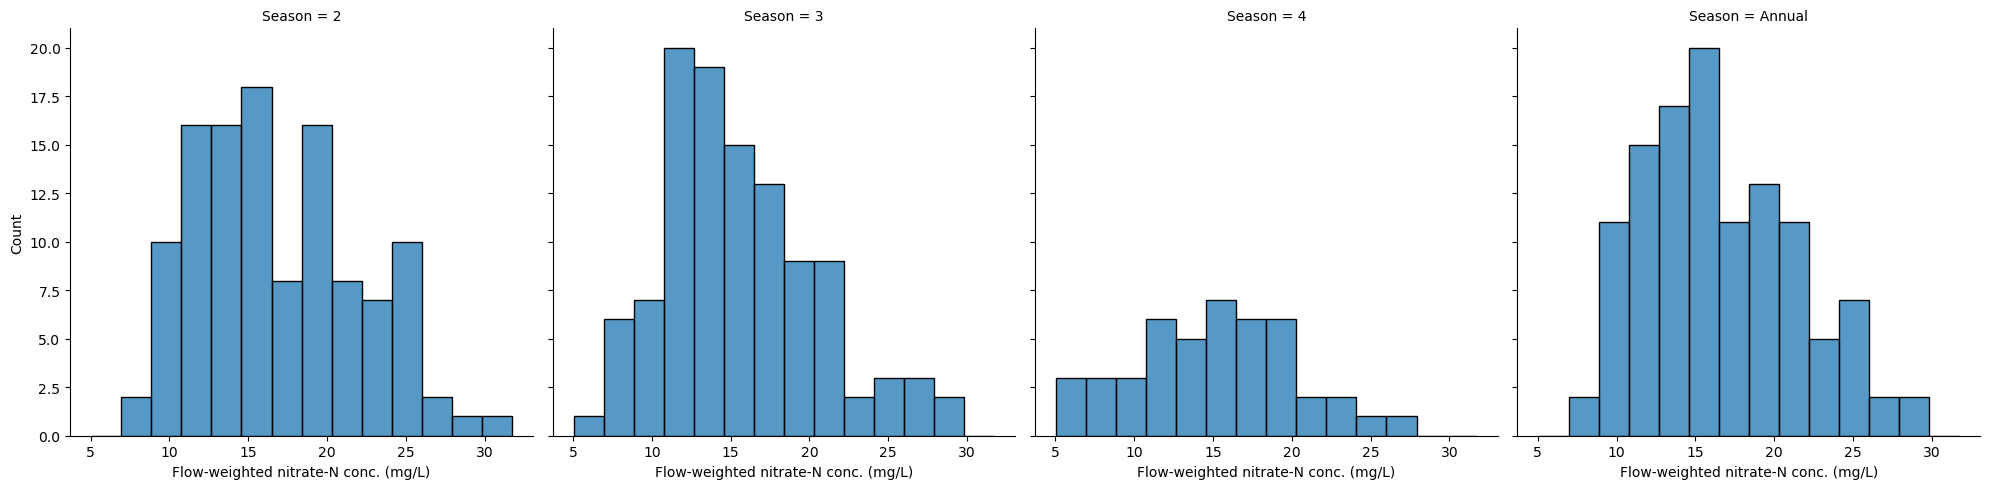

In [331]:
conc_hist = sns.displot(ESNdf, x="Flow-weighted nitrate-N concentration", col = 'Season')
conc_hist.set_axis_labels('Flow-weighted nitrate-N conc. (mg/L)','Count')
plt.savefig('conchist.png')
plt.show()

In [309]:
ESN_drain = ESNdf.groupby(['Season', 'TrtO']).median()['Drainage'].reset_index()
ESN_Nload = ESNdf.groupby(['Season', 'TrtO']).median()['Nitrate load'].reset_index()
ESN_Nconc = ESNdf.groupby(['Season', 'TrtO']).median()['Flow-weighted nitrate-N concentration'].reset_index()

ESN_trt = pd.merge(left=ESN_drain, right=ESN_Nload, on= ['TrtO', 'Season'])
ESN_trt = pd.merge(left=ESN_trt, right=ESN_Nconc, on= ['TrtO', 'Season'])
ESN_trt

,Season,TrtO,Drainage,Nitrate load,Flow-weighted nitrate-N concentration
0,2,CPP-150,20.353337,32.070755,16.849723
1,2,CPPPOLY-150,15.686766,25.466695,14.747759
2,2,CPPUREA-150,15.854014,24.952803,15.753820
3,3,CPP-150,2.772745,3.474858,15.001115
4,3,CPPPOLY-150,2.108651,2.882041,13.909884
5,3,CPPUREA-150,2.768600,3.378024,16.336454
6,4,CPP-150,0.000000,0.000000,13.795487
7,4,CPPPOLY-150,0.000000,0.000000,14.002705
8,4,CPPUREA-150,0.000000,0.000000,17.323365
9,Annual,CPP-150,25.136344,43.493315,15.989413


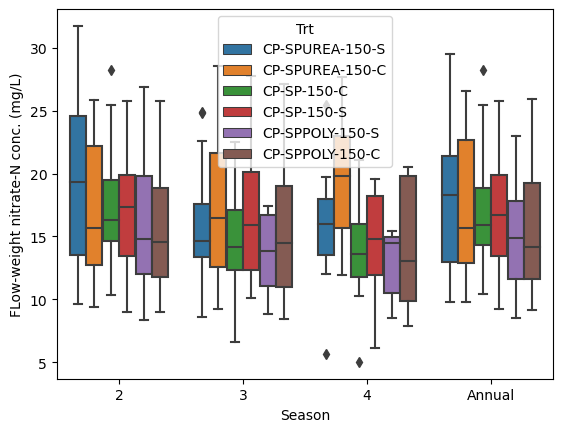

In [327]:
sns.boxplot(data = ESNdf, x = 'Season', y = 'Flow-weighted nitrate-N concentration', hue = 'Trt')
plt.ylabel('FLow-weight nitrate-N conc. (mg/L)')
plt.savefig('concbox1.png')
plt.show()
### No obvious patterns or trends related to corn vs soybean year -> Don't distinguish in further analysis

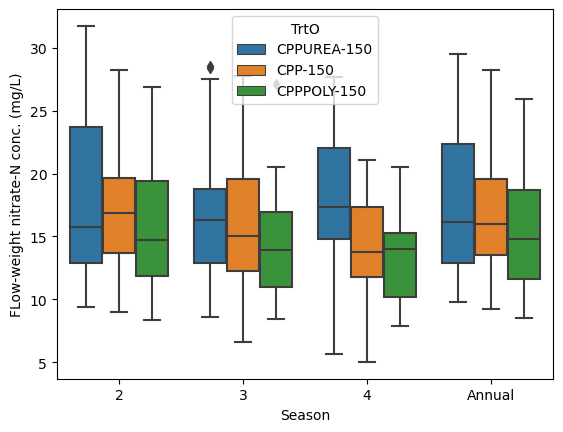

In [328]:
sns.boxplot(data = ESNdf, x = 'Season', y = 'Flow-weighted nitrate-N concentration', hue = 'TrtO')
plt.ylabel('FLow-weight nitrate-N conc. (mg/L)')
plt.savefig('concbox2.png')
plt.show()

# Linear regression

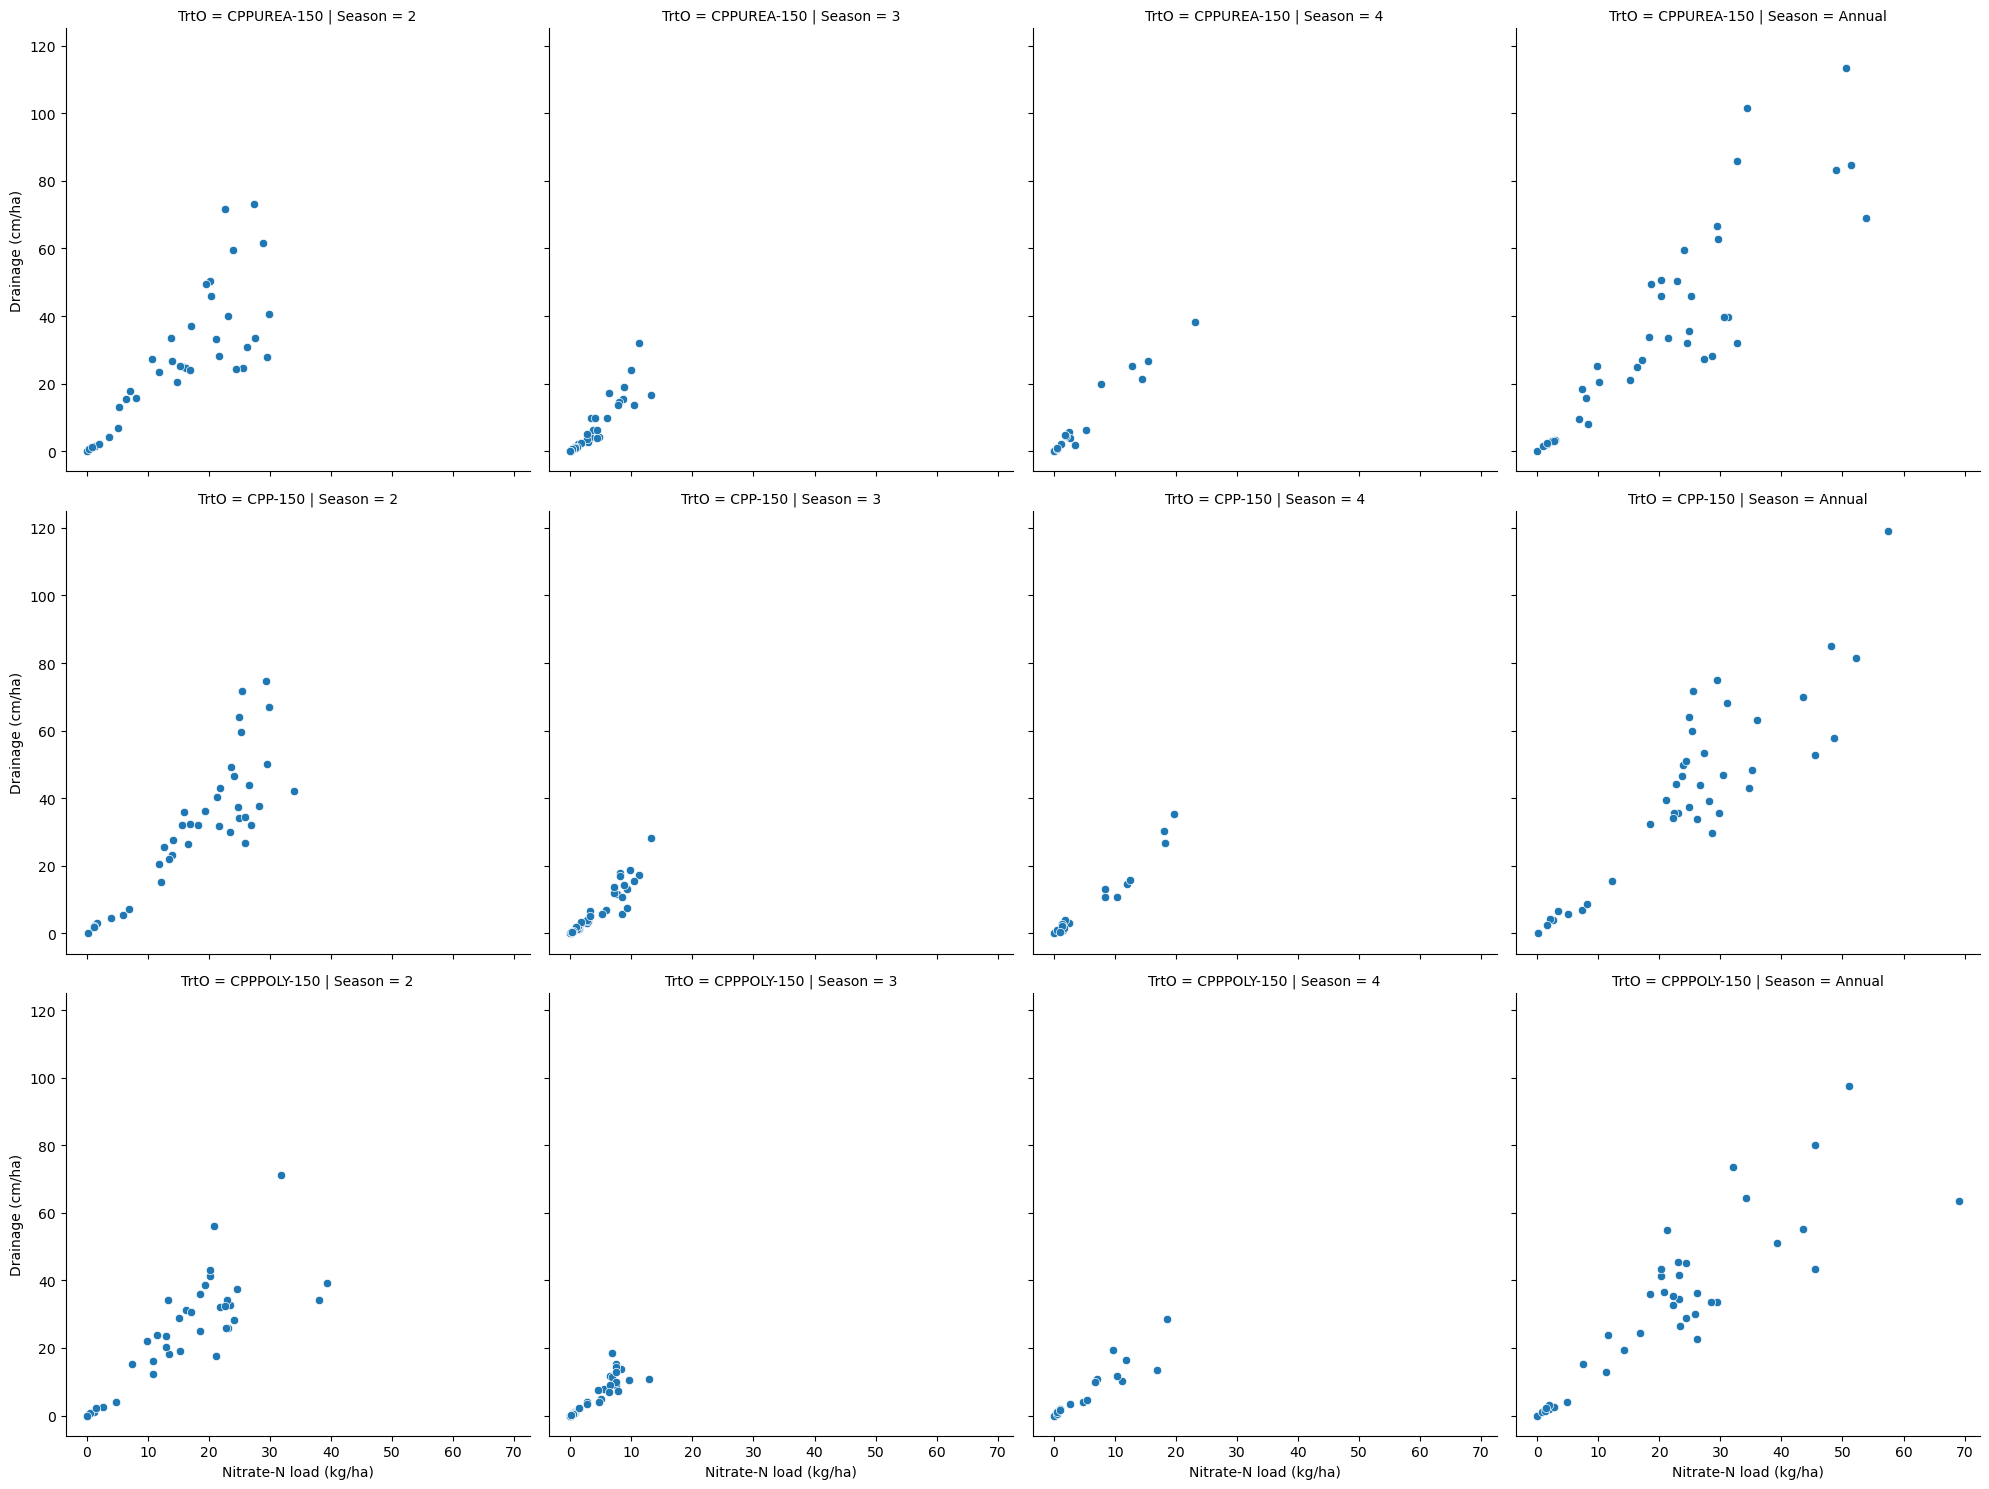

In [347]:
fwnc = sns.relplot(data = ESNdf, x = 'Drainage', y = 'Nitrate load', row = 'TrtO', col = 'Season')
fwnc.set_axis_labels('Nitrate-N load (kg/ha)','Drainage (cm/ha)')
plt.savefig('fwnc.png')
plt.show()

### Season 2 and Annual show signs of heteroskedacicity: 
### generalized least squares likely a better model than ordinary least squares

In [51]:
import statsmodels.api as sm

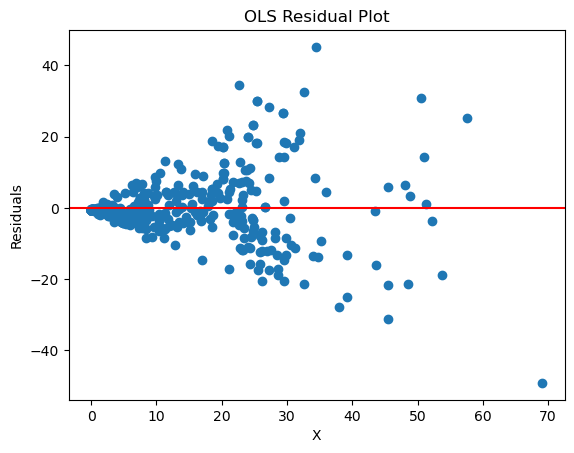

In [339]:
### Fit ordinary least squares for nitrate load vs drainage
x = ESNdf['Drainage']
y = ESNdf['Nitrate load']
X = sm.add_constant(x)
model = sm.OLS(y, X)
results = model.fit()

### Calculate residuals
residuals = results.resid

### Residual plot
plt.scatter(x, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('OLS Residual Plot')
plt.savefig('residual.png')
plt.show()

### heteroskedacicity confirmed

In [53]:
poly_sub = ESNdf[(ESNdf['TrtO'] == 'CPPPOLY-150')]
urea_sub = ESNdf[(ESNdf['TrtO'] == 'CPPUREA-150')]
nh4_sub = ESNdf[(ESNdf['TrtO'] == 'CPP-150')]

In [54]:
ESN_2 = ESNdf[(ESNdf['Season'] == '2')]
ESN_3 = ESNdf[(ESNdf['Season'] == '3')]
ESN_4 = ESNdf[(ESNdf['Season'] == '4')]

In [334]:
poly = sm.GLS(poly_sub['Nitrate load'], poly_sub['Drainage'])
poly_results = poly.fit()
urea = sm.GLS(urea_sub['Nitrate load'], urea_sub['Drainage'])
urea_results = urea.fit()
nh4 = sm.GLS(nh4_sub['Nitrate load'], nh4_sub['Drainage'])
nh4_results = nh4.fit()

In [335]:
print("Annual urea nitrate load vs drainage:")
print(urea_results.summary())

Annual urea nitrate load vs drainage:
                                 GLS Regression Results                                
Dep. Variable:           Nitrate load   R-squared (uncentered):                   0.905
Model:                            GLS   Adj. R-squared (uncentered):              0.904
Method:                 Least Squares   F-statistic:                              1469.
Date:                Sun, 30 Apr 2023   Prob (F-statistic):                    5.85e-81
Time:                        19:59:50   Log-Likelihood:                         -566.84
No. Observations:                 156   AIC:                                      1136.
Df Residuals:                     155   BIC:                                      1139.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
---

In [337]:
print("Annual poly nitrate load vs drainage:")
print(poly_results.summary())

Annual poly nitrate load vs drainage:
                                 GLS Regression Results                                
Dep. Variable:           Nitrate load   R-squared (uncentered):                   0.906
Model:                            GLS   Adj. R-squared (uncentered):              0.906
Method:                 Least Squares   F-statistic:                              1537.
Date:                Sun, 30 Apr 2023   Prob (F-statistic):                    1.23e-83
Time:                        20:01:35   Log-Likelihood:                         -554.14
No. Observations:                 160   AIC:                                      1110.
Df Residuals:                     159   BIC:                                      1113.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
---

In [338]:
print("Annual NH4 nitrate load vs drainage:")
print(poly_results.summary())

Annual NH4 nitrate load vs drainage:
                                 GLS Regression Results                                
Dep. Variable:           Nitrate load   R-squared (uncentered):                   0.906
Model:                            GLS   Adj. R-squared (uncentered):              0.906
Method:                 Least Squares   F-statistic:                              1537.
Date:                Sun, 30 Apr 2023   Prob (F-statistic):                    1.23e-83
Time:                        20:01:50   Log-Likelihood:                         -554.14
No. Observations:                 160   AIC:                                      1110.
Df Residuals:                     159   BIC:                                      1113.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
----

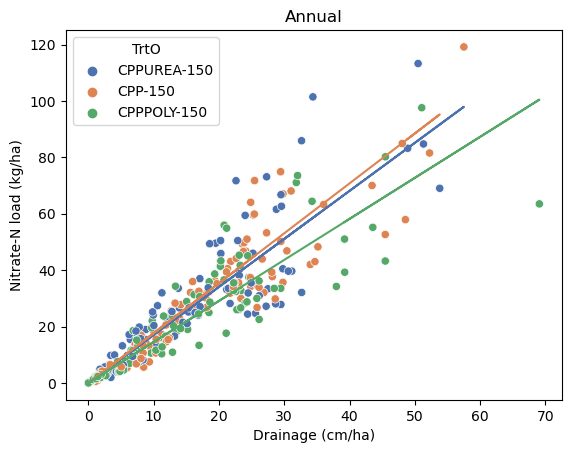

In [348]:
colors = sns.color_palette('deep', n_colors = 3)
sns.scatterplot(data = ESNdf, x = 'Drainage', y = 'Nitrate load', hue = 'TrtO', palette = colors)
plt.plot(nh4_sub['Drainage'], nh4_results.predict(), color=colors[0])
plt.plot(urea_sub['Drainage'], urea_results.predict(), color=colors[1])
plt.plot(poly_sub['Drainage'], poly_results.predict(), color=colors[2])
plt.title('Annual')
plt.xlabel('Drainage (cm/ha)')
plt.ylabel('Nitrate-N load (kg/ha)')
plt.savefig('annual.png')
plt.show()

In [57]:
### Subset to look at treatment differences in each season
nh4_sub2 = ESNdf[(ESNdf['TrtO'] == 'CPP-150') & (ESNdf['Season'] == '2')]
urea_sub2 = ESNdf[(ESNdf['TrtO'] == 'CPPUREA-150') & (ESNdf['Season'] == '2')]
poly_sub2 = ESNdf[(ESNdf['TrtO'] == 'CPPPOLY-150') & (ESNdf['Season'] == '2')]

nh4_sub3 = ESNdf[(ESNdf['TrtO'] == 'CPP-150') & (ESNdf['Season'] == '3')]
urea_sub3 = ESNdf[(ESNdf['TrtO'] == 'CPPUREA-150') & (ESNdf['Season'] == '3')]
poly_sub3 = ESNdf[(ESNdf['TrtO'] == 'CPPPOLY-150') & (ESNdf['Season'] == '3')]

nh4_sub4 = ESNdf[(ESNdf['TrtO'] == 'CPP-150') & (ESNdf['Season'] == '4')]
urea_sub4 = ESNdf[(ESNdf['TrtO'] == 'CPPUREA-150') & (ESNdf['Season'] == '4')]
poly_sub4 = ESNdf[(ESNdf['TrtO'] == 'CPPPOLY-150') & (ESNdf['Season'] == '4')]

In [58]:
### Run generalized least squares model for all trt and season combinations
nh4_2 = sm.GLS(nh4_sub2['Nitrate load'], nh4_sub2['Drainage'])
nh4_results2 = nh4_2.fit()

urea_2 = sm.GLS(urea_sub2['Nitrate load'], urea_sub2['Drainage'])
urea_results2 = urea_2.fit()

poly_2 = sm.GLS(poly_sub2['Nitrate load'], poly_sub2['Drainage'])
poly_results2 = poly_2.fit()
###################################
nh4_3 = sm.GLS(nh4_sub3['Nitrate load'], nh4_sub3['Drainage'])
nh4_results3 = nh4_3.fit()

urea_3 = sm.GLS(urea_sub3['Nitrate load'], urea_sub3['Drainage'])
urea_results3 = urea_3.fit()

poly_3 = sm.GLS(poly_sub3['Nitrate load'], poly_sub3['Drainage'])
poly_results3 = poly_3.fit()
####################################
nh4_4 = sm.GLS(nh4_sub4['Nitrate load'], nh4_sub4['Drainage'])
nh4_results4 = nh4_4.fit()

urea_4 = sm.GLS(urea_sub4['Nitrate load'], urea_sub4['Drainage'])
urea_results4 = urea_4.fit()

poly_4 = sm.GLS(poly_sub4['Nitrate load'], poly_sub4['Drainage'])
poly_results4 = poly_4.fit()

In [59]:
print("Season 2 Urea nitrate load vs drainage:")
print(urea_results2.summary())

Season 2 Urea nitrate load vs drainage:
                                 GLS Regression Results                                
Dep. Variable:           Nitrate load   R-squared (uncentered):                   0.881
Model:                            GLS   Adj. R-squared (uncentered):              0.878
Method:                 Least Squares   F-statistic:                              281.3
Date:                Sun, 30 Apr 2023   Prob (F-statistic):                    3.72e-19
Time:                        13:34:42   Log-Likelihood:                         -150.20
No. Observations:                  39   AIC:                                      302.4
Df Residuals:                      38   BIC:                                      304.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-

In [60]:
print("Season 2 NH4 nitrate load vs drainage:")
print(nh4_results2.summary())

Season 2 NH4 nitrate load vs drainage:
                                 GLS Regression Results                                
Dep. Variable:           Nitrate load   R-squared (uncentered):                   0.930
Model:                            GLS   Adj. R-squared (uncentered):              0.928
Method:                 Least Squares   F-statistic:                              517.4
Date:                Sun, 30 Apr 2023   Prob (F-statistic):                    4.07e-24
Time:                        13:34:43   Log-Likelihood:                         -148.37
No. Observations:                  40   AIC:                                      298.7
Df Residuals:                      39   BIC:                                      300.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
--

In [61]:
print("Season 2 Poly nitrate load vs drainage:")
print(poly_results2.summary())

Season 2 Poly nitrate load vs drainage:
                                 GLS Regression Results                                
Dep. Variable:           Nitrate load   R-squared (uncentered):                   0.898
Model:                            GLS   Adj. R-squared (uncentered):              0.895
Method:                 Least Squares   F-statistic:                              342.8
Date:                Sun, 30 Apr 2023   Prob (F-statistic):                    6.41e-21
Time:                        13:34:43   Log-Likelihood:                         -145.67
No. Observations:                  40   AIC:                                      293.3
Df Residuals:                      39   BIC:                                      295.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-

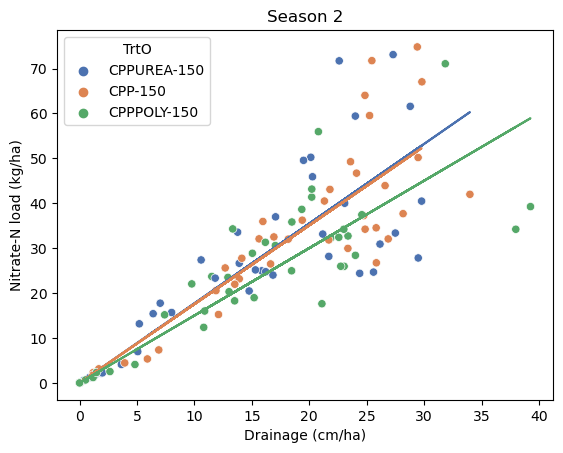

In [349]:
sns.scatterplot(data = ESN_2, x = 'Drainage', y = 'Nitrate load', hue = 'TrtO', palette = colors)
plt.plot(nh4_sub2['Drainage'], nh4_results2.predict(), color=colors[0])
plt.plot(urea_sub2['Drainage'], urea_results2.predict(), color=colors[1])
plt.plot(poly_sub2['Drainage'], poly_results2.predict(), color=colors[2])
plt.title('Season 2')
plt.xlabel('Drainage (cm/ha)')
plt.ylabel('Nitrate-N load (kg/ha)')
plt.savefig('season2.png')
plt.show()

In [63]:
print("Season 3 Urea nitrate load vs drainage:")
print(urea_results3.summary())

Season 3 Urea nitrate load vs drainage:
                                 GLS Regression Results                                
Dep. Variable:           Nitrate load   R-squared (uncentered):                   0.905
Model:                            GLS   Adj. R-squared (uncentered):              0.903
Method:                 Least Squares   F-statistic:                              362.4
Date:                Sun, 30 Apr 2023   Prob (F-statistic):                    4.98e-21
Time:                        13:34:44   Log-Likelihood:                         -98.974
No. Observations:                  39   AIC:                                      199.9
Df Residuals:                      38   BIC:                                      201.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-

In [64]:
print("Season 3 NH4 nitrate load vs drainage:")
print(nh4_results3.summary())

Season 3 NH4 nitrate load vs drainage:
                                 GLS Regression Results                                
Dep. Variable:           Nitrate load   R-squared (uncentered):                   0.928
Model:                            GLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                              505.7
Date:                Sun, 30 Apr 2023   Prob (F-statistic):                    6.17e-24
Time:                        13:34:45   Log-Likelihood:                         -93.819
No. Observations:                  40   AIC:                                      189.6
Df Residuals:                      39   BIC:                                      191.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
--

In [65]:
print("Season 3 Poly nitrate load vs drainage:")
print(poly_results3.summary())

Season 3 Poly nitrate load vs drainage:
                                 GLS Regression Results                                
Dep. Variable:           Nitrate load   R-squared (uncentered):                   0.896
Model:                            GLS   Adj. R-squared (uncentered):              0.894
Method:                 Least Squares   F-statistic:                              336.6
Date:                Sun, 30 Apr 2023   Prob (F-statistic):                    8.79e-21
Time:                        13:34:46   Log-Likelihood:                         -91.608
No. Observations:                  40   AIC:                                      185.2
Df Residuals:                      39   BIC:                                      186.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-

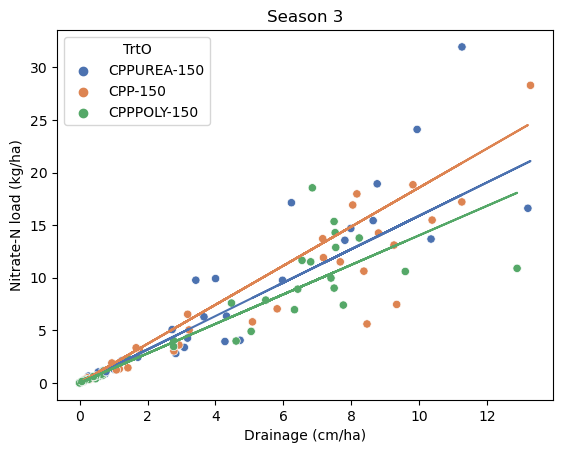

In [350]:
sns.scatterplot(data = ESN_3, x = 'Drainage', y = 'Nitrate load', hue = 'TrtO', palette = colors)
plt.plot(nh4_sub3['Drainage'], nh4_results3.predict(), color=colors[0])
plt.plot(urea_sub3['Drainage'], urea_results3.predict(), color=colors[1])
plt.plot(poly_sub3['Drainage'], poly_results3.predict(), color=colors[2])
plt.title('Season 3')
plt.xlabel('Drainage (cm/ha)')
plt.ylabel('Nitrate-N load (kg/ha)')
plt.savefig('season3.png')
plt.show()

In [67]:
print("Season 4 Urea nitrate load vs drainage:")
print(urea_results4.summary())

Season 4 Urea nitrate load vs drainage:
                                 GLS Regression Results                                
Dep. Variable:           Nitrate load   R-squared (uncentered):                   0.974
Model:                            GLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              1451.
Date:                Sun, 30 Apr 2023   Prob (F-statistic):                    7.00e-32
Time:                        13:34:47   Log-Likelihood:                         -73.099
No. Observations:                  39   AIC:                                      148.2
Df Residuals:                      38   BIC:                                      149.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-

In [68]:
print("Season 4 NH4 nitrate load vs drainage:")
print(nh4_results4.summary())

Season 4 NH4 nitrate load vs drainage:
                                 GLS Regression Results                                
Dep. Variable:           Nitrate load   R-squared (uncentered):                   0.975
Model:                            GLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              1531.
Date:                Sun, 30 Apr 2023   Prob (F-statistic):                    6.52e-33
Time:                        13:34:47   Log-Likelihood:                         -73.808
No. Observations:                  40   AIC:                                      149.6
Df Residuals:                      39   BIC:                                      151.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
--

In [69]:
print("Season 4 Poly nitrate load vs drainage:")
print(poly_results4.summary())

Season 4 Poly nitrate load vs drainage:
                                 GLS Regression Results                                
Dep. Variable:           Nitrate load   R-squared (uncentered):                   0.917
Model:                            GLS   Adj. R-squared (uncentered):              0.915
Method:                 Least Squares   F-statistic:                              432.9
Date:                Sun, 30 Apr 2023   Prob (F-statistic):                    1.02e-22
Time:                        13:34:48   Log-Likelihood:                         -86.764
No. Observations:                  40   AIC:                                      175.5
Df Residuals:                      39   BIC:                                      177.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-

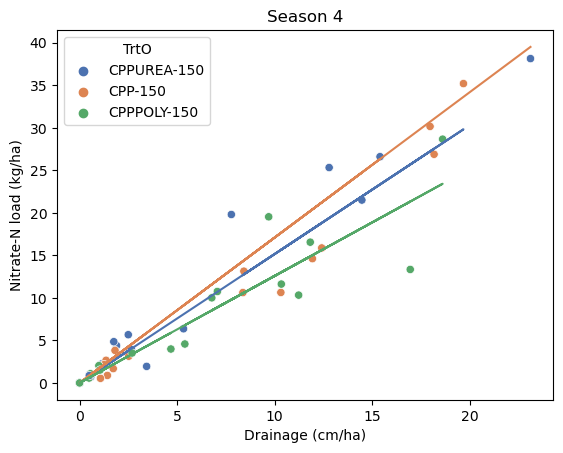

In [351]:
sns.scatterplot(data = ESN_4, x = 'Drainage', y = 'Nitrate load', hue = 'TrtO', palette = colors)
plt.plot(nh4_sub4['Drainage'], nh4_results4.predict(), color=colors[0])
plt.plot(urea_sub4['Drainage'], urea_results4.predict(), color=colors[1])
plt.plot(poly_sub4['Drainage'], poly_results4.predict(), color=colors[2])
plt.title('Season 4')
plt.xlabel('Drainage (cm/ha)')
plt.ylabel('Nitrate-N load (kg/ha)')
plt.savefig('season4.png')
plt.show()

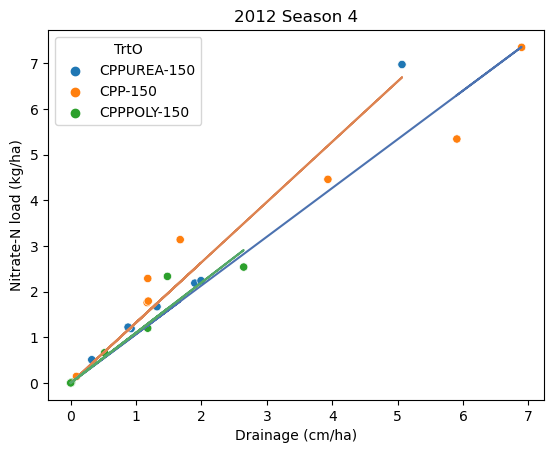

In [352]:
### Look at nitrate load vs drainage relationship between treatments in abnormal conditions: 
### Season 2 2012 (low drainage) and Season 4 2015 (high drainage)

twel_sub = ESNdf[(ESNdf['Year'] == 2012) & (ESNdf['Season'] == '2')]

nh4_sub12 = twel_sub[(twel_sub['TrtO'] == 'CPP-150')]
urea_sub12 = twel_sub[(twel_sub['TrtO'] == 'CPPUREA-150')]
poly_sub12 = twel_sub[(twel_sub['TrtO'] == 'CPPPOLY-150')]

nh4_12 = sm.OLS(nh4_sub12['Nitrate load'], nh4_sub12['Drainage'])
nh4_results12 = nh4_12.fit()

urea_12 = sm.OLS(urea_sub12['Nitrate load'], urea_sub12['Drainage'])
urea_results12 = urea_12.fit()

poly_12 = sm.OLS(poly_sub12['Nitrate load'], poly_sub12['Drainage'])
poly_results12 = poly_12.fit()

sns.scatterplot(data = twel_sub, x = 'Drainage', y = 'Nitrate load', hue = 'TrtO')
plt.plot(nh4_sub12['Drainage'], nh4_results12.predict(), color=colors[0])
plt.plot(urea_sub12['Drainage'], urea_results12.predict(), color=colors[1])
plt.plot(poly_sub12['Drainage'], poly_results12.predict(), color=colors[2])
plt.title('2012 Season 4')
plt.xlabel('Drainage (cm/ha)')
plt.ylabel('Nitrate-N load (kg/ha)')
plt.savefig('12s4.png')
plt.show()


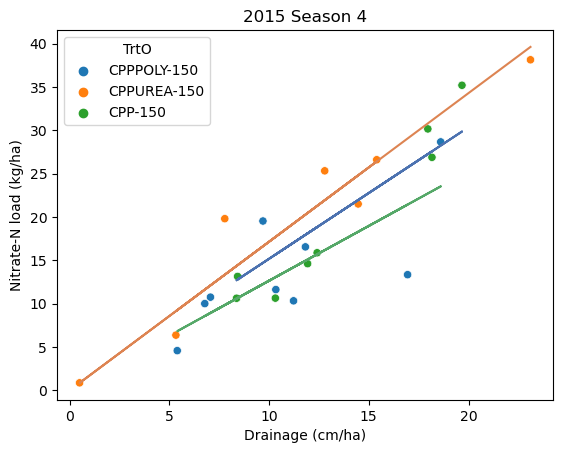

In [353]:
fift_sub = ESNdf[(ESNdf['Year'] == 2015) & (ESNdf['Season'] == '4')]

nh4_sub15 = fift_sub[(fift_sub['TrtO'] == 'CPP-150')]
urea_sub15 = fift_sub[(fift_sub['TrtO'] == 'CPPUREA-150')]
poly_sub15 = fift_sub[(fift_sub['TrtO'] == 'CPPPOLY-150')]

nh4_15 = sm.OLS(nh4_sub15['Nitrate load'], nh4_sub15['Drainage'])
nh4_results15 = nh4_15.fit()

urea_15 = sm.OLS(urea_sub15['Nitrate load'], urea_sub15['Drainage'])
urea_results15 = urea_15.fit()

poly_15 = sm.OLS(poly_sub15['Nitrate load'], poly_sub15['Drainage'])
poly_results15 = poly_15.fit()

sns.scatterplot(data = fift_sub, x = 'Drainage', y = 'Nitrate load', hue = 'TrtO')
plt.plot(nh4_sub15['Drainage'], nh4_results15.predict(), color=colors[0])
plt.plot(urea_sub15['Drainage'], urea_results15.predict(), color=colors[1])
plt.plot(poly_sub15['Drainage'], poly_results15.predict(), color=colors[2])
plt.title('2015 Season 4')
plt.xlabel('Drainage (cm/ha)')
plt.ylabel('Nitrate-N load (kg/ha)')
plt.savefig('15s4.png')
plt.show()

# Resampling

In [74]:
# Write a function to draw bootstrap replicates with 3 inputs: sample data, function to calculate statistic, number of replicates
def draw_bs_reps(data, func, size = 1):
    """Draw Bootstrap replicates"""
    
    # Initialize an empty array of for Bootstrap replicates: bs_replicates
    bs_replicates = np.empty(size)
    
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bs_replicate_1d(data, func)
        
    return(bs_replicates)

In [96]:
# A function to generate permutation statistic replicates
def draw_permutation_reps(data1, data2, func, size = 1):
    '''Generate permutation statistic replicates of given size'''
    
    # Initiate an empty permutation array 
    perm_reps = np.empty(size)
    
    for i in range(size):
        
        # Generate a pair of permutation sample with given array
        perm_sample_1, perm_sample_2 = permutation_sample(data1, data2)
        
        # calculate test statistic using the input func
        perm_reps[i] = func(perm_sample_1, perm_sample_2)
        
    return(perm_reps)

In [76]:
def mean_diff(arr1, arr2):
    diff = np.mean(arr2) - np.mean(arr1)
    return(diff)

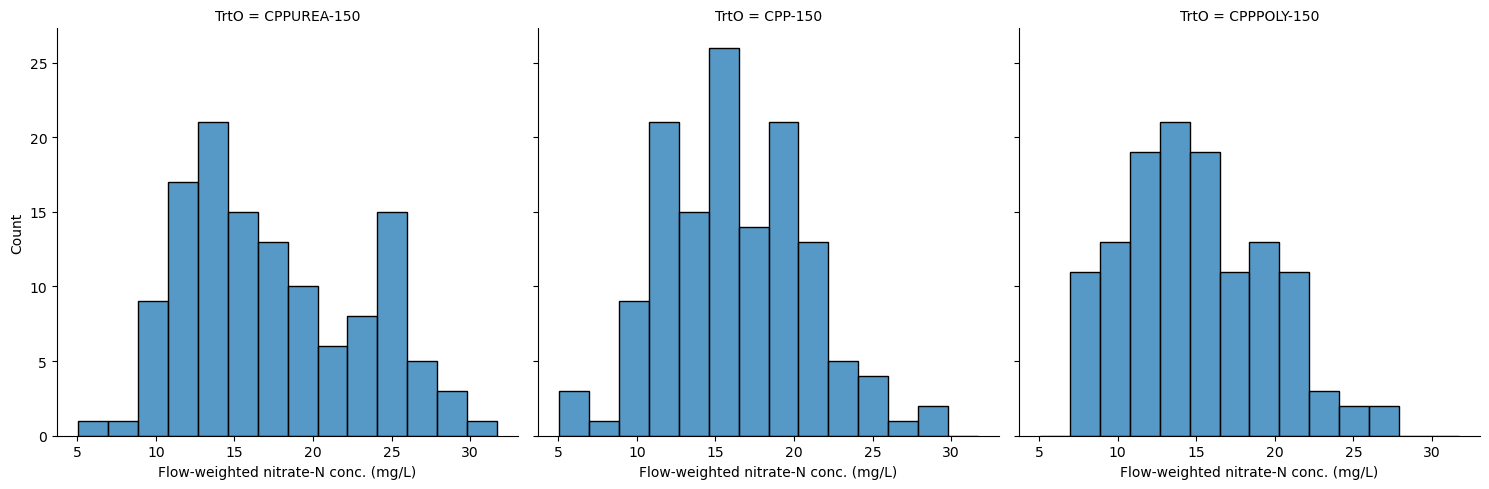

In [355]:
fwnc_hist = sns.displot(ESNdf, x="Flow-weighted nitrate-N concentration", col = 'TrtO')
fwnc_hist.set_axis_labels('Flow-weighted nitrate-N conc. (mg/L)','Count')
plt.savefig('fwnc_hist.png')
plt.show()

In [117]:
### how much concentration data do we have for each treatment?
conc_poly = ESNdf.loc[(ESNdf.TrtO == 'CPPPOLY-150')].loc[:, 'Nitrate concentration']
len(conc_poly)

160

In [118]:
### how many NAs do we have for each treatment concentrations
print(conc_poly.isna().sum())

35


In [119]:
conc_urea = ESNdf.loc[(ESNdf.TrtO == 'CPPUREA-150')].loc[:, 'Nitrate concentration']
len(conc_urea)
### there was one urea plot from the original exp design that we do not have data for in any year. So length is 156, not 160

156

In [120]:
print(conc_urea.isna().sum())

31


In [121]:
conc_nh4 = ESNdf.loc[(ESNdf.TrtO == 'CPP-150')].loc[:, 'Nitrate concentration']
len(conc_nh4)

160

In [122]:
print(conc_nh4.isna().sum())

25


In [123]:
### drop the NA concentrations for each treatment. Each dataset has a different length now
conc_poly = conc_poly.dropna()
conc_urea = conc_urea.dropna()
conc_nh4 = conc_nh4.dropna()

In [124]:
conc_poly = conc_poly.to_numpy()
conc_urea = conc_urea.to_numpy()
conc_nh4 = conc_nh4.to_numpy()

## Bootstrap confidence intervals

In [86]:
np.mean(conc_poly)

14.895350026872

In [87]:
np.mean(conc_urea)

17.402367273095997

In [88]:
np.mean(conc_nh4)

16.258440511622222

In [134]:
bs_conc_poly = draw_bs_reps(conc_poly, np.mean, size = 10000)
bs_conc_urea = draw_bs_reps(conc_urea, np.mean, size = 10000)
bs_conc_nh4 = draw_bs_reps(conc_nh4, np.mean, size = 10000)

In [135]:
np.percentile(bs_conc_poly, [2.5, 97.5])

array([14.11988072, 15.69251087])

In [136]:
np.percentile(bs_conc_urea, [2.5, 97.5])

array([16.4064303 , 18.40347965])

In [137]:
np.percentile(bs_conc_nh4, [2.5, 97.5])

array([15.49219447, 17.03865261])

## Permutation test

In [112]:
### Ho: The flow-weighted nitrate concentration measured from poly and urea plots are the same
### Ha: The flow-weighted nitrate concentation measured from poly plots is less than urea plots

# Generate permutation replicates: perm_reps
perm_reps = draw_permutation_reps(conc_poly, conc_urea, mean_diff, size=10000)

# Calculate observed test statistic from `mags_pre` and `mags_post` arrays: diff_obs
diff_obs = mean_diff(conc_poly, conc_urea)

# Compute and print p-value
p_val = np.sum(perm_reps > diff_obs) / 10000
print('p =', p_val)

p = 0.0002


In [129]:
### Ho: The flow-weighted nitrate concentration measured from poly and NH4 plots are the same
### Ha: The flow-weighted nitrate concentation measured from poly plots is less than NH4 plots

# Generate permutation replicates: perm_reps
perm_reps = draw_permutation_reps(conc_poly, conc_nh4, mean_diff, size=10000)

# Calculate observed test statistic from `mags_pre` and `mags_post` arrays: diff_obs
diff_obs = mean_diff(conc_poly, conc_nh4)

# Compute and print p-value
p_val = np.sum(perm_reps > diff_obs) / 10000
print('p =', p_val)

p = 0.0078


We reject the null hypothesis that mean flow-weighted nitrate concentration in drainage is the same between plots fertilized with poly coated urea fertilizer and plots fertilized with urea or ammonia and conclude that poly coated urea fertilized plots have lower flow-weighted nitrate concentration than urea and ammonia plots.